In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotting_functions as plot

In [3]:
train = pd.read_csv('updated_train.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
Id                      1460 non-null int64
MSSubClass              1460 non-null int64
MSZoning                1460 non-null object
LotFrontage             1201 non-null float64
LotArea                 1460 non-null int64
Street                  1460 non-null object
Alley                   91 non-null object
LotShape                1460 non-null object
LandContour             1460 non-null object
Utilities               1460 non-null object
LotConfig               1460 non-null object
LandSlope               1460 non-null object
Neighborhood            1460 non-null object
Condition1              1460 non-null object
Condition2              1460 non-null object
BldgType                1460 non-null object
HouseStyle              1460 non-null object
OverallQual             1460 non-null int64
OverallCond             1460 non-null int64
YearBuilt               1460 non-null int64


In [5]:
len(train[(train['YearBuilt']) < (train['YearRemodAdd'])])

696

In [6]:
train[(train['YearBuilt']) < (train['YearRemodAdd'])][['YearBuilt','YearRemodAdd']]

,YearBuilt,YearRemodAdd
2,2001,2002
3,1915,1970
5,1993,1995
6,2004,2005
8,1931,1950
9,1939,1950
11,2005,2006
13,2006,2007
15,1929,2001
19,1958,1965


In [13]:
def remod(row):
    remod = 0
    if row['YearRemodAdd'] - row['YearBuilt'] > 1:
        remod = 1
    return remod

In [14]:
train['remodel'] = train.apply(remod, axis=1)

In [15]:
train['remodel'].value_counts()

0    979
1    481
Name: remodel, dtype: int64

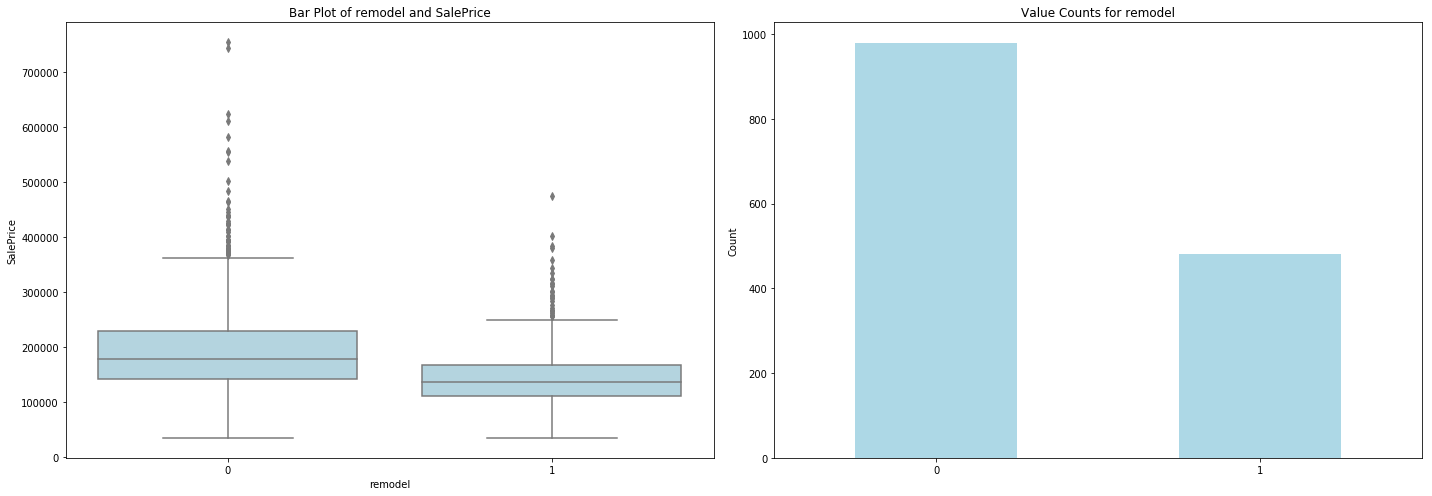

In [16]:
plot.bar_box(train,'remodel','SalePrice')

In [21]:
train['total_porch_sf'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + \
                          train['ScreenPorch']

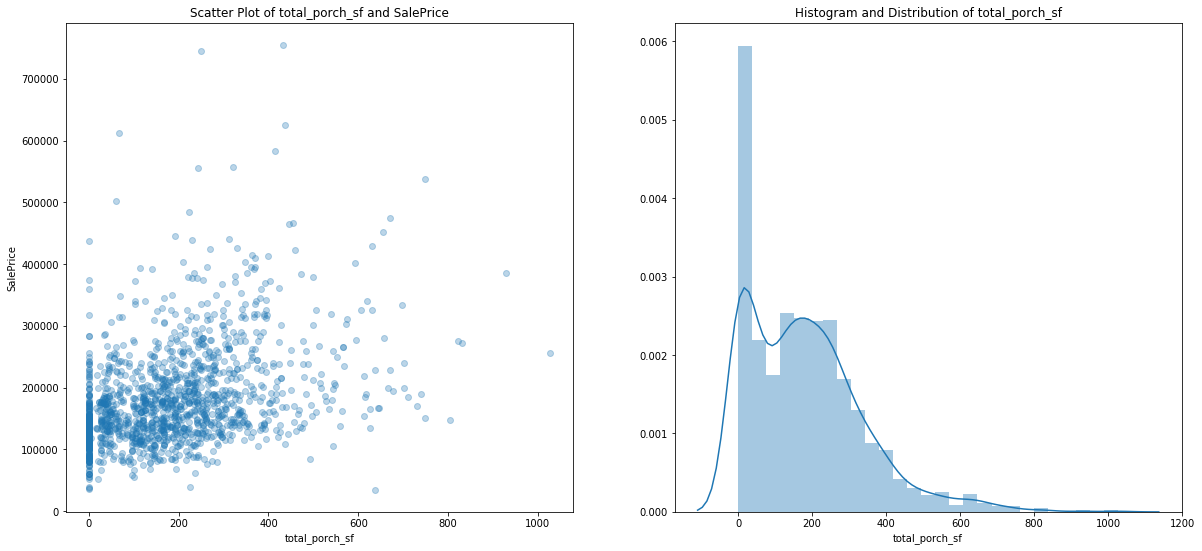

<Figure size 432x288 with 0 Axes>

In [22]:
plot.scatter_hist(train,'total_porch_sf','SalePrice',False)

In [23]:
train[['total_porch_sf','SalePrice']].corr()

,total_porch_sf,SalePrice
total_porch_sf,1.000000,0.390993
SalePrice,0.390993,1.000000


In [28]:
train.to_csv('updated_train_2.csv', index=False)